# Importing Libraries


In [29]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

# Load Dataset

In [30]:
X_train = np.loadtxt('input.csv',delimiter = ',')
Y_train = np.loadtxt('labels.csv',delimiter = ',')

X_test = np.loadtxt('input_test.csv',delimiter = ',')
Y_test = np.loadtxt('labels_test.csv',delimiter = ',')

# Reshape of Dataset

In [31]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255.0
X_test = X_test/255.0

In [32]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

### Shape of Dataset

In [33]:
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


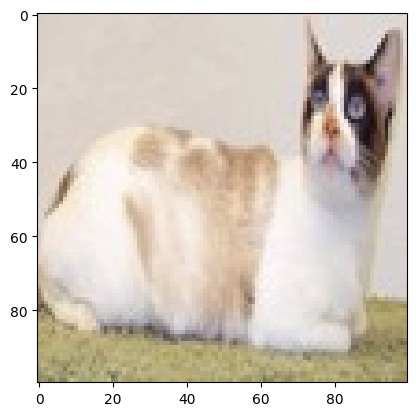

In [34]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [35]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3), name='conv2d_4'),
    MaxPooling2D((2,2), 
                 2,
    
    Conv2D(32, (3,3), activation='relu', name='conv2d_5'),
    MaxPooling2D((2,2), name='max_pooling2d_5'),
    
    Flatten(name='flatten_2'),
    Dense(64, activation='relu', name='dense_4'),
    Dense(1, activation='sigmoid', name='dense_5')
])

In [36]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

**Data Augmentation**

In [37]:
train_datagen = ImageDataGenerator(
    shear_range=0.2,   # Shearing effect
    zoom_range=0.2,    # Random zoom
    horizontal_flip=True  # Flip images horizontally
)

train_generator = train_datagen.flow(X_train, Y_train, batch_size=32)

## Training the Model

In [40]:
history = model.fit(X_train, Y_train,epochs = 5,batch_size = 64, validation_data=(X_test, Y_test))

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.9265 - loss: 0.2127 - val_accuracy: 0.6800 - val_loss: 0.7761
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.9552 - loss: 0.1616 - val_accuracy: 0.6750 - val_loss: 0.8615
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.9355 - loss: 0.1661 - val_accuracy: 0.6750 - val_loss: 0.8194
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - accuracy: 0.9619 - loss: 0.1351 - val_accuracy: 0.6775 - val_loss: 0.9617
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.9782 - loss: 0.0875 - val_accuracy: 0.6925 - val_loss: 1.0219


In [41]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6724 - loss: 1.1794


[1.0219321250915527, 0.6924999952316284]

## Training and Validation Accuracy

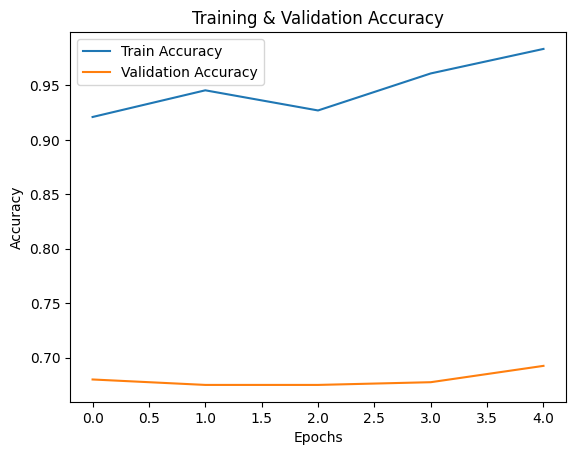

In [42]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()

# Visualization of Layers


In [43]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_4', 'max_pooling2d_4', 'conv2d_5', 'max_pooling2d_5', 'flatten_2', 'dense_4', 'dense_5']


# Making Predictions

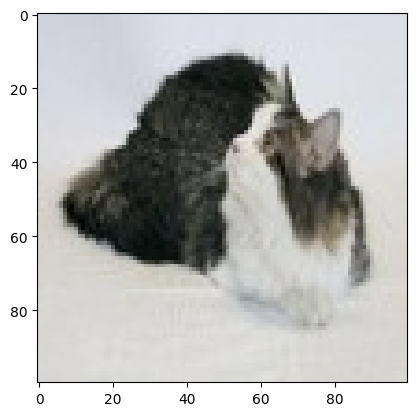

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
our model recognize it as cat


In [44]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
y_pred = y_pred >0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
print('our model recognize it as',pred)

## Model Accuracy

In [45]:
%%capture
# Model Accuracy
X = model.evaluate(X_train,Y_train)
Y = model.evaluate(X_test,Y_test)

In [46]:
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(X[1]*100,X[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(Y[1]*100,Y[0]))

Training Accuracy  : 99.35%     Training loss  : 0.054010
Validation Accuracy: 69.25%     Validation loss: 1.021932
